In [94]:
from savReaderWriter import SavReader
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [95]:
with SavReader('data.sav') as reader:
    header = reader.header
    records = reader.all()

In [96]:
df = pd.DataFrame(records, columns=header)
df.head()

,ID,country,survey,q1,Q2,q3,Q4,Q5,Q6,Q6N,...,STRATUM_US,PSU_CHI,PSU_GRE,PSU_HUN,PSU_INDIA,PSU_ITA,PSU_KEN,PSU_NIG,PSU_POL,PSU_RSA
0,1.0,19.0,1201604.0,1.0,NaN,3.0,NaN,NaN,NaN,NaN,...,68604.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,19.0,1201604.0,1.0,NaN,2.0,NaN,NaN,NaN,NaN,...,59550.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,19.0,1201604.0,1.0,NaN,3.0,NaN,NaN,NaN,NaN,...,87572.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,19.0,1201604.0,1.0,NaN,2.0,NaN,NaN,NaN,NaN,...,71642.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,19.0,1201604.0,2.0,NaN,3.0,NaN,NaN,NaN,NaN,...,74602.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
df[[c for c in df.columns if 'PSU_' in c]][df['country'] == 14].head()

,PSU_CHI,PSU_GRE,PSU_HUN,PSU_INDIA,PSU_ITA,PSU_KEN,PSU_NIG,PSU_POL,PSU_RSA
19129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110175990.0,NaN
19130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110175990.0,NaN
19131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110175990.0,NaN
19132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110175990.0,NaN
19133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110175990.0,NaN


In [98]:
sorted(list(df.columns))

['AUSa',
 'AUSb',
 'AUSc',
 'AUSd',
 'AUSe',
 'ID',
 'PSU_CHI',
 'PSU_GRE',
 'PSU_HUN',
 'PSU_INDIA',
 'PSU_ITA',
 'PSU_KEN',
 'PSU_NIG',
 'PSU_POL',
 'PSU_RSA',
 'Q100',
 'Q100CHI',
 'Q101',
 'Q102a',
 'Q102b',
 'Q103',
 'Q104a',
 'Q104b',
 'Q104c',
 'Q104d',
 'Q104e',
 'Q104f',
 'Q104g',
 'Q104h',
 'Q105a',
 'Q105b',
 'Q105c',
 'Q105d',
 'Q105e',
 'Q106a',
 'Q106b',
 'Q106c',
 'Q106d',
 'Q106e',
 'Q106f',
 'Q106g',
 'Q106h',
 'Q109AUS',
 'Q109AUSb',
 'Q109BRI',
 'Q109BRIb',
 'Q109CAN',
 'Q109CANb',
 'Q109CHI',
 'Q109FRA',
 'Q109FRAb',
 'Q109GER',
 'Q109GERb',
 'Q109GRE',
 'Q109GREb',
 'Q109HUN',
 'Q109HUNb',
 'Q109IND',
 'Q109INDb',
 'Q109ITA',
 'Q109ITAb',
 'Q109JPN',
 'Q109JPNB',
 'Q109KEN',
 'Q109KENb',
 'Q109NET',
 'Q109NETb',
 'Q109NIG',
 'Q109NIGb',
 'Q109POL',
 'Q109POLb',
 'Q109RSA',
 'Q109RSAb',
 'Q109SPA',
 'Q109SPAb',
 'Q109SWE',
 'Q109SWEb',
 'Q10A',
 'Q10B',
 'Q10C',
 'Q10D',
 'Q10E',
 'Q10K',
 'Q10f',
 'Q10g',
 'Q10h',
 'Q10i',
 'Q10j',
 'Q110',
 'Q111',
 'Q113AUSa',
 '

In [99]:
df = df[df['country'] == 14]

In [100]:
df['q108'].unique()

array([55., 70., 67., 52., 58., 30., 31., 60., 37., 39., 51., 81., 64.,
       44., 54., 57., 33., 65., 92., 23., 90., 85., 93., 56., 34., 43.,
       63., 53., 35., 99., 59., 50., 25., 48., 28., 41., 73., 38., 46.,
       49., 61., 72., 47., 84., 74., 86., 27., 80., 19., 40., 32., 36.,
       26., 42., 21., 20., 18., 69., 29., 24., 45., 62., 77., 22., 71.,
       75., 83., 78., 79., 76., 68., 66., 82., 88., 91.])

In [101]:
df['age group'] = pd.cut(df['q108'], [17] + range(20, 100, 10) + [97])

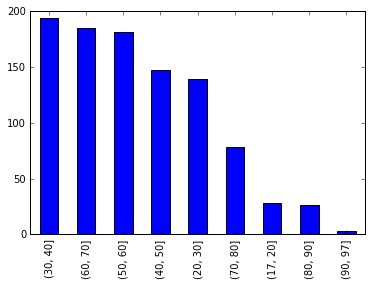

In [102]:
df['age group'].value_counts().plot(kind='bar')

In [103]:
#for letter in ['a', 'b', 'c', 'd', 'e']:
#    df.drop(df[df['Q15%s' % letter] > 4].index, inplace=True)

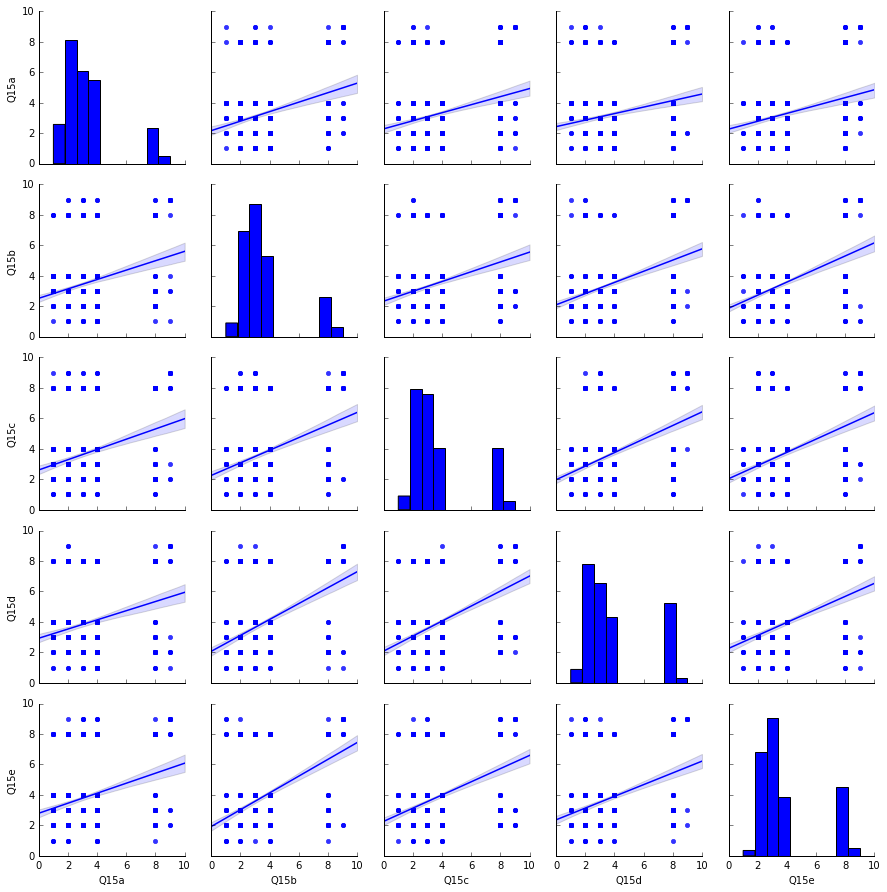

In [104]:
sns.pairplot(df[[c for c in df.columns if 'Q15' in c]], kind='reg')

In [105]:
df[[c for c in df.columns if 'Q15' in c]].as_matrix().argmin(axis=1)

array([1, 0, 1, ..., 1, 0, 2], dtype=int64)

In [106]:
df.drop(df[df['Q132'] > 6].index, inplace=True)

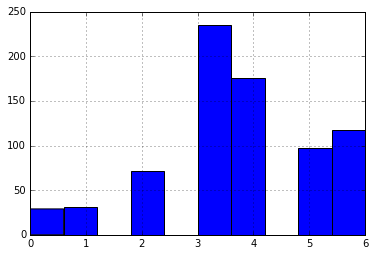

In [107]:
df['Q132'].hist()

In [109]:
df['political view'] = pd.cut(df['Q132'], [-1, 1, 4, 6], labels=['left', 'center', 'right'])

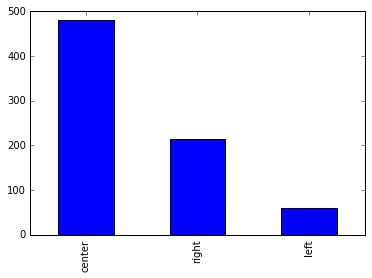

In [110]:
df['political view'].value_counts().plot(kind='bar')